In [1]:
from sympy import *
from IPython.display import display, Math, Latex

In [2]:
init_printing()

In [3]:
# Kippenhahn, Weigert, Weiss pg. 236 
alpha, delta, lambd, nu, phi, a, b = symbols('alpha, delta, lambda, nu, phi, a, b')
z1,z2,z3,z4 = symbols('z1,z2,z3,z4')
p1,p2,p3,p4 = symbols('p1,p2,p3,p4')
t1,t2,t3,t4 = symbols('t1,t2,t3,t4')
s1,s2,s3,s4 = symbols('s1,s2,s3,s4')

In [4]:
LHS1 = Matrix([z1, p1, t1, s1])
LHS2 = Matrix([z2, p2, t2, s2])
LHS3 = Matrix([z3, p3, t3, s3])
LHS4 = Matrix([z4, p4, t4, s4])

RHS1 = Matrix([-1,  -2,         -1, -1])
RHS2 = Matrix([phi,  0, -lambd*phi,  0])
RHS3 = Matrix([0,    0,         -1,  0])
RHS4 = Matrix([0,    0,          0, -1])

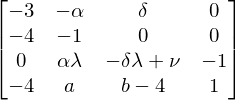

In [5]:
LHS = Matrix([[-3,      -alpha,          delta,  0],
              [-4,          -1,              0,  0],
              [ 0, lambd*alpha, nu-lambd*delta, -1],
              [-4,           a,            b-4,  1]])

display(LHS)

In [6]:
display(Math(latex(LHS) + ' ' + \
             latex(Matrix(symbols('z_i, p_i, t_i, s_i'))) + '=' + \
             latex(RHS1) + ',' + \
             latex(RHS2) + ',' + \
             latex(RHS3) + ',' + \
             latex(RHS4)))

<IPython.core.display.Math object>

System 1


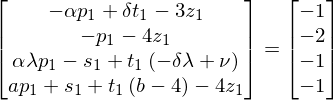

In [7]:
print('System 1')
display(Eq(LHS * LHS1, RHS1))

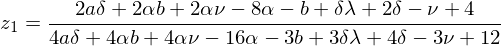

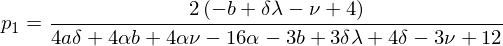

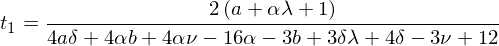

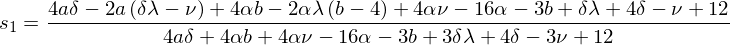

In [8]:
sol1 = solve(LHS * LHS1 - RHS1, LHS1)

for key in sol1:
    display(Eq(key, simplify(sol1[key])))

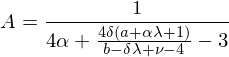

Check that solutions agree with Kippenhahn


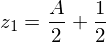

True

True

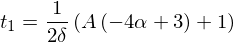

True

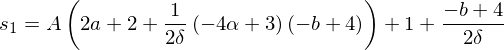

True

In [9]:
A = (4*delta * (1+a+lambd*alpha) / (nu + b - 4 - lambd*delta) + 4*alpha - 3)**-1
display(Eq(Symbol('A'), A))
print("Check that solutions agree with Kippenhahn")
z1kip = Rational(1, 2) * (1+Symbol('A'))
p1kip = -2 * Symbol('A')
t1kip = 1/(2*delta) * (1 + (3-4*alpha) * Symbol('A'))
s1kip = (1+(4-b)/(2*delta) + (2 + 2*a + (3-4*alpha)/(2*delta) * (4-b)) * Symbol('A'))
display(Eq(z1, z1kip))
display(simplify(sol1[z1] - z1kip.subs({Symbol('A'): A})) == 0)
display(Eq(p1, p1kip))
display(simplify(sol1[p1] - p1kip.subs({Symbol('A'): A})) == 0)
display(Eq(t1, t1kip))
display(simplify(sol1[t1] - t1kip.subs({Symbol('A'): A})) == 0)
display(Eq(s1, s1kip))
display(simplify(sol1[s1] - s1kip.subs({Symbol('A'): A})) == 0)

System 2


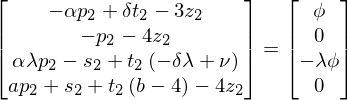

In [10]:
print('System 2')
display(Eq(LHS * LHS2, RHS2))

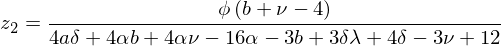

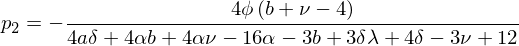

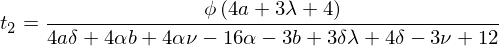

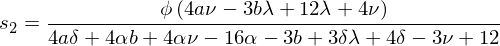

In [11]:
sol2 = solve(LHS * LHS2 - RHS2, LHS2)

for key in sol2:
    display(Eq(key, simplify(sol2[key])))

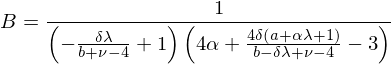

Check that solutions agree with Kippenhahn


True

True

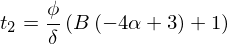

True

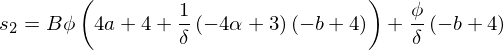

True

In [12]:
B = A * (1 - lambd*delta / (nu+b-4))**-1
display(Eq(Symbol('B'), B))
print("Check that solutions agree with Kippenhahn")
z2kip = phi*Symbol('B')
p2kip = -4*phi*Symbol('B')
t2kip = (phi/delta * (1+(3-4*alpha)*Symbol('B')))
s2kip = (phi/delta * (4-b) + phi*(4+4*a + (3-4*alpha)/delta * (4-b))*Symbol('B'))
display(Eq(z2, z2kip))
display(simplify(sol2[z2] - z2kip.subs({Symbol('B'): B})) == 0)
display(Eq(p2, p2kip))
display(simplify(sol2[p2] - p2kip.subs({Symbol('B'): B})) == 0)
display(Eq(t2, t2kip))
display(simplify(sol2[t2] - t2kip.subs({Symbol('B'): B})) == 0)
display(Eq(s2, s2kip))
display(simplify(sol2[s2] - s2kip.subs({Symbol('B'): B})) == 0)

System 3


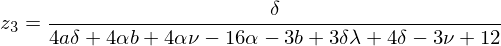

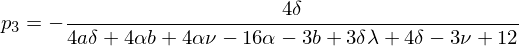

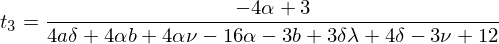

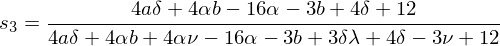

In [13]:
print('System 3')
sol3 = solve(LHS * LHS3 - RHS3, LHS3)

for key in sol3:
    display(Eq(key, simplify(sol3[key])))

System 4


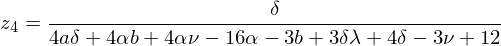

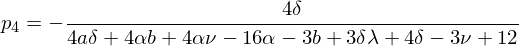

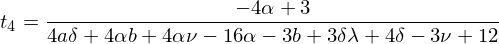

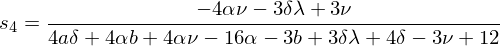

In [14]:
print('System 4')
sol4 = solve(LHS * LHS4 - RHS4, LHS4)

for key in sol4:
    display(Eq(key, simplify(sol4[key])))

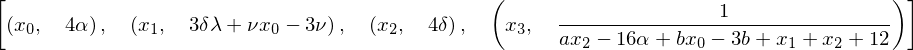

In [15]:
sol = cse([sol4[key] for key in sol4], optimizations='basic')
display(sol[0])
display(sol[1])

Polytrope


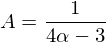

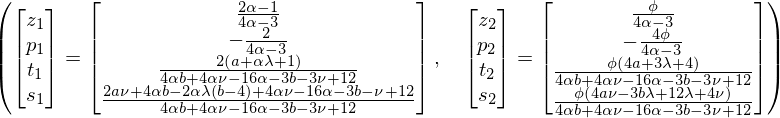

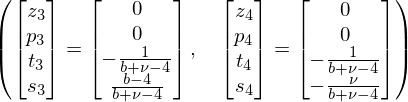

...and assuming non-relativistic degenerate electron gas


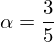

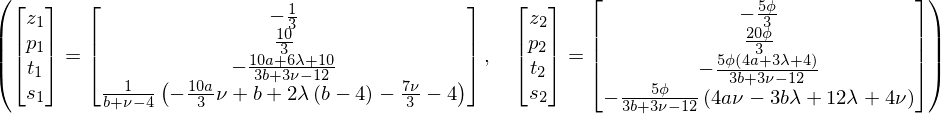

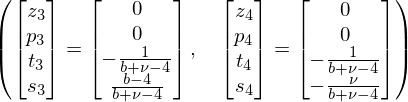

In [16]:
print("Polytrope")

_delta = 0
display(Eq(Symbol('delta'), _delta))
subs_dict = {delta:_delta}

display(Eq(Symbol('A'), A.subs(subs_dict)))

def display_system(subs_dict):
    display((Eq(LHS1, Matrix([simplify(sol1[key].subs(subs_dict)) for key in sol1])),
             Eq(LHS2, Matrix([simplify(sol2[key].subs(subs_dict)) for key in sol2]))))
    display((Eq(LHS3, Matrix([simplify(sol3[key].subs(subs_dict)) for key in sol3])),
             Eq(LHS4, Matrix([simplify(sol4[key].subs(subs_dict)) for key in sol4]))))

display_system(subs_dict)

print("...and assuming non-relativistic degenerate electron gas")
_alpha = Rational(3, 5)
display(Eq(Symbol('alpha'), _alpha))
subs_dict = {delta:_delta, alpha:_alpha}

display_system(subs_dict)

In [17]:
print("Now assuming ideal gas...")
display(Eq(Eq(Eq(alpha, delta), phi), 1))
_alpha, _delta, _phi = 1, 1, 1

Now assuming ideal gas...


...and constant opacity


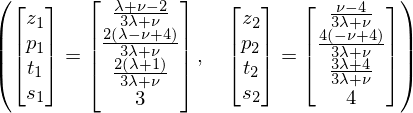

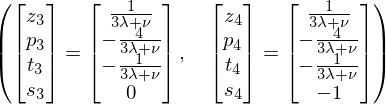

with an energy generation rate that scales linearly with density


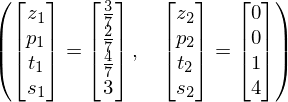

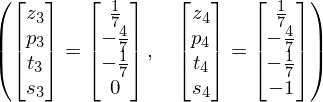

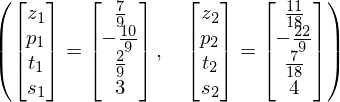

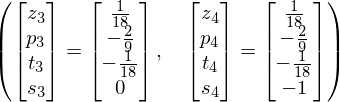

In [18]:
print("...and constant opacity")
_a, _b = 0, 0
display(Eq(Eq(a,b), _a))

subs_dict = {alpha:_alpha, delta:_delta, phi:_phi, a:_a, b:_b}
display_system(subs_dict)

_lambd = 1
print('with an energy generation rate that scales linearly with density')

for _nu in [4, 15]:
    display((Eq(lambd, _lambd), Eq(nu, _nu)))
    subs_dict = {alpha:_alpha, delta:_delta, phi:_phi, a:_a, b:_b, lambd:_lambd, nu:_nu}
    display_system(subs_dict)

...or, an opacity from Kramer's law


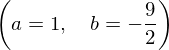

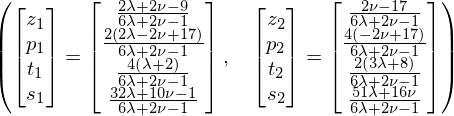

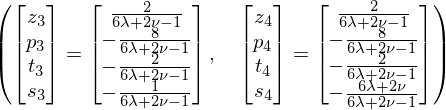

now again assuming an energy generation rate that scales linearly with density


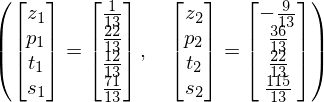

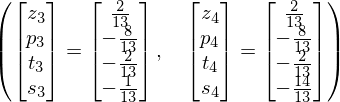

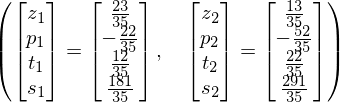

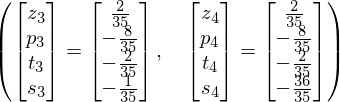

In [19]:
print("...or, an opacity from Kramer's law")
_a = 1
_b = Rational(-9, 2)
display((Eq(a, _a),
         Eq(b, _b)))

subs_dict = {alpha:_alpha, delta:_delta, phi:_phi, a:_a, b:_b}
display_system(subs_dict)

_lambd = 1
print('now again assuming an energy generation rate that scales linearly with density')
display(Eq(lambd, _lambd))

for _nu in [4, 15]:
    display((Eq(lambd, _lambd), Eq(nu, _nu)))
    subs_dict = {alpha:_alpha, delta:_delta, phi:_phi, a:_a, b:_b, lambd:_lambd, nu:_nu}
    display_system(subs_dict)